# Multi-Armed Bandits

Multi-armed bandit (MAB) problems are a class of sequential decision-making problems that model the trade-off between exploration and exploitation. The name comes from the metaphor of a gambler facing multiple slot machines (one-armed bandits), each with a different probability of payout. The gambler's objective is to maximize their total reward over a series of pulls. 

The MAB problem can be formalized as follows:
- **Arms**: let $K$ be the number of arms (choices or actions) available.
- **Rewards**: each arm $k \in \{1, 2, \ldots, K\}$ provides a reward $r_k(t)$ at time $t$.
- **Objective**: the objective is to maximize the cumulative reward over $T$ rounds, $\sum_{t=1}^{T} r_k(t)$.

Imagine you are a decision-maker in an electricity market, tasked with optimizing various strategies such as dynamic pricing, demand response programs, or marketing campaigns. Each strategy can be thought of as a slot machine (arm), each with an unknown probability of success (reward). You have a limited budget and need to decide how to allocate resources across these strategies to maximize your overall reward. The dilemma is that the more you explore different strategies to learn their effectiveness, the less you have left to exploit the best-performing strategy. This trade-off between exploration (trying different options to gather information) and exploitation (using known information to maximize reward) lies at the heart of the multi-armed bandit (MAB) problem.

**Practical applications** of MAB problems in electricity markets might include:
1. **Dynamic pricing**: suppose you need to determine the optimal pricing strategy for electricity during peak and off-peak hours. You could implement different pricing models (arms) and observe consumer reactions (rewards). Using MAB, you can dynamically adjust the pricing strategies based on observed data to maximize revenue without running prolonged inefficient experiments.

2. **Demand response programmes**: consider various incentive schemes to encourage consumers to reduce usage during peak times. Each scheme can be tested (explored) initially, and based on which ones yield the highest reductions in usage (exploitation), more resources can be allocated to the most effective programs.

3. **Marketing campaigns**: you may have multiple marketing strategies to promote energy-efficient appliances. Initially, you allocate equal resources to all strategies to see which performs best. As data comes in, you shift more resources to the campaigns that show higher engagement and conversion rates, optimizing your overall marketing budget.


## MAB vs. A/B testing
Traditional methods for testing different options, such as A/B testing, involve splitting resources equally across different strategies (pure exploration), but this can be inefficient and costly, as it doesn't adapt to the observed performance of the strategies. To this extent, the key **limitations of A/B testing** are:
- **Resource inefficiency**: equally distributing resources among all strategies can waste time and opportunities on less-performing options.
- **Costly**: every test interaction involves costs related to market operations, consumer interactions, and potential financial impacts.
- **Non-personalized**: A/B testing typically identifies a winner for the majority, which may not be optimal for all segments of the market.

On the other side, the **advantages of MAB approaches** include:
- **Dynamic allocation**: MAB algorithms initially explore all options but gradually allocate more resources to the best-performing strategies, improving overall efficiency.
- **Higher success rates**: by continuously adapting to performance data, MAB approaches can increase the overall success rate of the strategies implemented.
- **Contextual personalization**: advanced MAB variants like contextual bandits tailor strategies to different market segments, enhancing personalization and engagement.


## Key concepts and high-level example
The two key conepts in MAB problems are:
1. **Exploration vs. exploitation**: where **exploration** means trying out different arms to gather more information about their rewards, and **exploitation** refers to choosing the arm that is currently believed to provide the highest reward.
2. **Regret**: the difference between the reward obtained by the optimal arm and the reward obtained by the algorithm. The goal is to minimize regret over time.


Let's break down the MAB problem step by step, focusing on the concepts of exploration, reward, and how they are computed.

**Step-by-step illustration**

**Setup**

Imagine you have three slot machines (arms) in a casino, each with an unknown probability of payout (reward). Initially, you do not know which machine is the best, so you need to **explore** by trying out each machine. Over time, as you gather more information, you start to get an idea about the different machines and can **exploit** the available information by choosing the machine that seems to give the highest reward based on your observations.

**True reward probabilities**:
- Slot Machine 1: 0.3
- Slot Machine 2: 0.5
- Slot Machine 3: 0.7

These probabilities are unknown to you. Your goal is to find out which machine has the highest probability of giving a payout by trying them out.

**Step 1: initial exploration**

To start, you need to try each machine a few times to get an idea of their payouts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True reward probabilities
true_means = [0.3, 0.5, 0.7]

# Number of times to pull each machine initially
initial_pulls = 10

# Simulate initial exploration
np.random.seed(42)
initial_rewards = []

for i in range(len(true_means)):
    rewards = []
    for _ in range(initial_pulls):
        reward = 1 if np.random.rand() < true_means[i] else 0
        rewards.append(reward)
    initial_rewards.append(rewards)

# Print initial rewards
for i, rewards in enumerate(initial_rewards):
    print(f"Rewards for Machine {i + 1}: {rewards}")

Rewards for Machine 1: [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
Rewards for Machine 2: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
Rewards for Machine 3: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


**Step 2: compute average rewards**

After the initial exploration, compute the average reward for each machine to get an estimate of their payout probabilities.

In [2]:
# Calculate average rewards
average_rewards = [np.mean(rewards) for rewards in initial_rewards]

# Print average rewards
for i, avg in enumerate(average_rewards):
    print(f"Average reward for Machine {i + 1}: {avg:.2f}")

Average reward for Machine 1: 0.30
Average reward for Machine 2: 0.70
Average reward for Machine 3: 0.90


The mean of the rewards obtained from the initial pulls for each machine. This gives an estimate of the payout probability for each machine.

**Step 3: exploitation**

Based on the average rewards, you start choosing the machine that seems to give the highest reward more often.

In [3]:
# Number of additional rounds
additional_rounds = 70

# Continue simulation
total_rewards = initial_rewards.copy()
cumulative_rewards = np.zeros(initial_pulls * 3 + additional_rounds)
cumulative_rewards[:initial_pulls * 3] = np.array([sum(rewards) for rewards in initial_rewards]).repeat(initial_pulls)

for t in range(additional_rounds):
    # Choose the machine with the highest average reward
    best_machine = np.argmax(average_rewards)
    
    # Simulate pulling the best machine
    reward = 1 if np.random.rand() < true_means[best_machine] else 0
    total_rewards[best_machine].append(reward)
    
    # Update average rewards
    average_rewards[best_machine] = np.mean(total_rewards[best_machine])
    
    # Update cumulative rewards
    cumulative_rewards[initial_pulls * 3 + t] = cumulative_rewards[initial_pulls * 3 + t - 1] + reward

# Print final average rewards
for i, avg in enumerate(average_rewards):
    print(f"Final average reward for Machine {i + 1}: {avg:.2f}")

Final average reward for Machine 1: 0.30
Final average reward for Machine 2: 0.64
Final average reward for Machine 3: 0.71


At each step, we define as **best machine** the machine with the highest average reward so far, and we continue pulling the best machine and update the average rewards based on the new observations.

**Step $: regret calculation**

Regret is a measure of how much worse our algorithm performs compared to if we had always chosen the best possible machine (the one with the highest true mean reward). If we knew in advance which machine had the highest probability of giving us a prize, we would always choose that machine. However, since we do not know this in advance, we have to try out all the machines to gather information. While we are trying out all the machines (exploring), we might choose the less optimal machines sometimes, which gives us less reward compared to the best machine.
Regret is the difference between the total reward we would have gotten by always choosing the best machine and the total reward we actually got by following our algorithm.

We have:
- Optimal reward: this is the reward we would have gotten if we had always chosen the best machine. It is calculated as the cumulative sum of the highest true mean reward over all rounds.
- Algorithm reward: this is the reward we actually got by following our algorithm, which includes exploration and exploitation steps.
- Regret: the difference between the optimal reward and the algorithm reward,

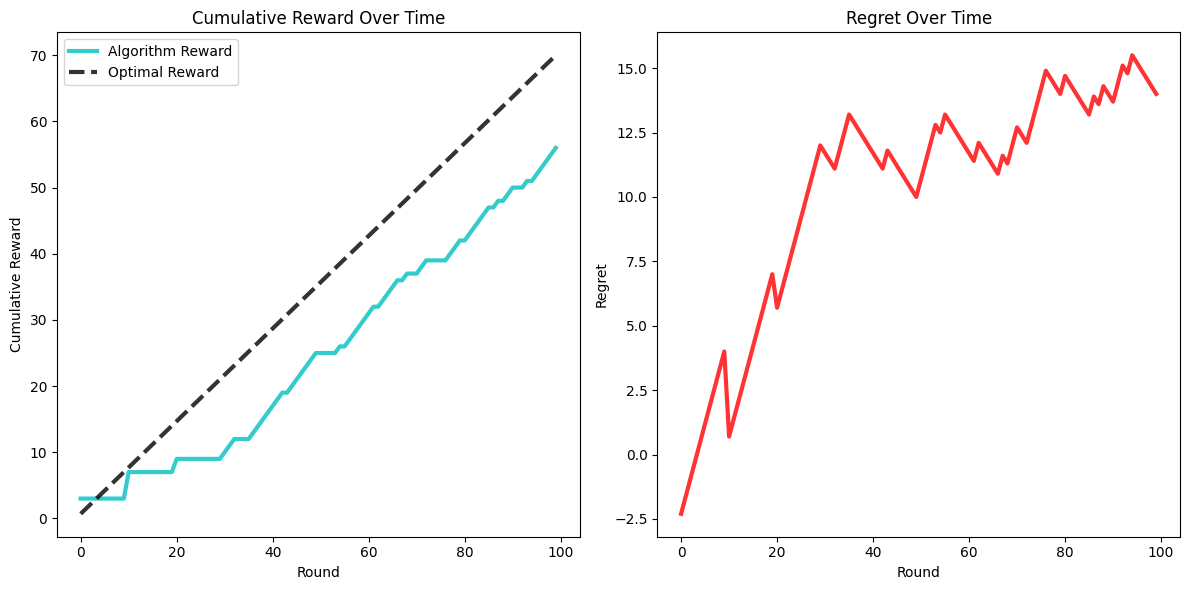

In [4]:
# True means and optimal reward
optimal_mean = max(true_means)
optimal_cumulative_rewards = np.cumsum([optimal_mean] * (initial_pulls * 3 + additional_rounds))

# Calculate regret
regret = optimal_cumulative_rewards - cumulative_rewards

# Plot cumulative rewards and regret
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards, label='Algorithm Reward', lw=3, c='c', alpha=.8)
plt.plot(optimal_cumulative_rewards, label='Optimal Reward', linestyle='--', lw=3, c='k', alpha=.8)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(regret, label='Regret', color='r', lw=3, alpha=.8)
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret Over Time')

plt.tight_layout()
plt.show()

**How to read these graphs**:

1. **Cumulative reward**:
   - This graph shows the total reward accumulated over time by the algorithm.
   - The x-axis represents the number of rounds (time), and the y-axis represents the cumulative reward.
   - Initially, during the exploration phase, the rewards might increase slowly because the algorithm is trying out different arms to gather information.
   - As the algorithm gathers more information and starts to exploit the best-performing arm, the slope of the cumulative reward graph should increase, indicating a faster accumulation of rewards.
   - The optimal cumulative reward line represents the reward we would have accumulated if we had always chosen the best arm from the beginning. This line has a constant, steep slope, indicating the highest possible reward accumulation rate.

2. **Regret**:
   - This graph shows the difference between the optimal cumulative reward and the cumulative reward obtained by the algorithm.
   - The x-axis represents the number of rounds (time), and the y-axis represents the regret.
   - At the beginning, the regret might increase rapidly because the algorithm is exploring and might be choosing suboptimal arms, leading to lower rewards compared to the optimal arm.
   - As the algorithm starts to exploit the best-performing arm more frequently, the rate at which regret increases should slow down. Ideally, the regret graph will start to flatten out, indicating that the algorithm is performing close to optimally.
   - The ideal scenario is to have a regret graph that flattens out as early as possible, showing that the algorithm quickly learned to choose the best arm.

## Key algorithms for MAB problems

In this section, we will explain three popular algorithms for solving the multi-armed bandit (MAB) problem: epsilon-greedy, upper confidence bound (UCB), and Thompson sampling. We will also compare their performance against a random strategy over multiple simulation runs.

### Epsilon-greedy

The Epsilon-Greedy algorithm balances exploration and exploitation by choosing a random arm with a small probability ($\epsilon$) and the best-known arm with a large probability (1 - $\epsilon$). Think of $\epsilon$ as your curiosity factor. A higher $\epsilon$ means you are more curious and willing to try different options even if you know some options perform well. A lower $\epsilon$ means you are more inclined to stick with what you know works best.

**Mechanism**:
- **Exploration**: with a small probability ($\epsilon$), you choose a random arm to try out new options.
- **Exploitation**: with a large probability (1 - $\epsilon$), you choose the arm that has given you the highest average reward so far.

**Formulation**:
- **Estimated mean reward**: for each arm $k$, you keep track of the average reward it has given you until this time $t$, $\hat{\mu}_k(t)$.
- **Updating the Estimate**: every time you pull an arm and get a reward, you update the average reward for that arm using the formula:
  \begin{equation}
    \hat{\mu}_k(t+1) = \hat{\mu}_k(t) + \frac{r_k(t) - \hat{\mu}_k(t)}{n_k(t)}
  \end{equation}

where $\hat{\mu}_k(t)$ is the current average reward for arm $k$ at time $t$, $r_k(t)$ is the reward you get from arm $k$ at time $t$, and $n_k(t)$ is the number of times you have pulled arm $k$ up to time $t$.

Intuitively, when you receive a new reward for an arm, you need to update your estimate of the arm's average reward. The goal is to make sure that this estimate becomes more accurate as you gather more data. To update the estimate of the average reward, we need to balance:
- New information: the reward you just observed provides new information about the arm's performance.
- Past experience the average reward you have observed so far reflects your past experience with that arm.

The update formula balances these two by adjusting the current average reward ($\hat{\mu}_k(t)$) using the new reward ($r_k(t)$). The difference between the new reward and the current average reward is adjusted by $\frac{1}{n_k(t)}$. This fraction gets smaller as $n_k(t)$, the number of times the arm has been pulled, increases. The key reasons for this is that:
- Diminishing impact: the fraction $\frac{1}{n_k(t)}$ ensures that the impact of new rewards diminishes over time. This means that early rewards have a bigger influence on your estimate, helping you quickly form an initial understanding of the arm's performance.
- As you pull the arm more times, you gather more information, and your estimate becomes more stable. New rewards should have less impact on the estimate because you already have a lot of information. Later rewards refine your estimate more subtly, preventing large swings in the estimate and ensuring that the estimate converges to the true average reward as you gather more data.

**Simple example to illustrate how it works**

- **First Pull**:
  - Suppose you pull an arm for the first time and get a reward of 10.
  - Your initial estimate $\hat{\mu}_k(1)$ is 10 because it's the only data point you have.

- **Second Pull**:
  - You pull the same arm again and get a reward of 8.
  - You update your estimate:
    \begin{equation}
    \hat{\mu}_k(2) = 10 + \frac{8 - 10}{2} = 9
    \end{equation}
  - The new reward adjusts the estimate significantly because you only have two data points.

- **Hundredth Pull**:
  - After pulling the arm 99 times, suppose your current estimate is 9.5.
  - You pull the arm one more time and get a reward of 9.
  - You update your estimate:
    \begin{equation}
    \hat{\mu}_k(100) = 9.5 + \frac{9 - 9.5}{100} = 9.495
    \end{equation}
  - The new reward barely changes the estimate because you have a lot of data, making the estimate more stable.

By using this adjustment, you ensure that your estimate of the average reward for each arm becomes more accurate and stable over time, leading to better decision-making in the epsilon-greedy algorithm.


**Implementation**:

In [5]:
def epsilon_greedy(arms, epsilon=0.1, n_rounds=1000):
    n_arms = len(arms)
    rewards = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    total_rewards = []

    for t in range(n_rounds):
        if np.random.rand() < epsilon:
            # Exploration: choose a random arm
            arm = np.random.choice(n_arms)
        else:
            # Exploitation: choose the best arm so far
            arm = np.argmax(rewards / (counts + 1e-5))

        # Simulate pulling the arm
        reward = np.random.rand() < arms[arm]
        rewards[arm] += reward
        counts[arm] += 1
        total_rewards.append(reward)
    
    return np.cumsum(total_rewards)

### Upper confidence bound (UCB)

This algorithm selects arms based on the upper confidence bounds (UCBs) of their estimated rewards. The UCB is a combination of the estimated reward and a term that accounts for the uncertainty in the estimate. The key idea is to decide which options to try out by balancing between choosing the option that seems the best based on what you know so far and exploring less-tried options to discover their potential. It does this by considering both the estimated reward of each option and the uncertainty around that estimate.

**Mechanism**:

- At each time step $t$, select the arm $k$ that maximizes the upper confidence bound $UCB_k(t)$.

**Formulation**:

- The upper confidence bound for arm $k$ at time $t$ is given by:
\begin{equation}
    UCB_k(t) = \hat{\mu}_k(t) + c \sqrt{\frac{\ln t}{n_k(t)}}
\end{equation}

which is composed of two terms:
- **Estimated reward**: the term $\hat{\mu}_k(t)$ represents our current best guess of the mean reward for arm $k$ based on the rewards we have observed so far. This is our current estimate of the average reward for arm $k$. It is updated every time we pull the arm and observe a reward, using the same updating mechanism as in the epsilon-greedy algorithm.
- **Uncertainty term**: The term $c \sqrt{\frac{\ln t}{n_k(t)}}$ represents the uncertainty or confidence interval around the estimated reward. It ensures that arms with fewer pulls (higher uncertainty) are given a higher chance of being selected. Here, $n_k(t)$ is the number of times arm $k$ has been selected up to time $t$, and $c$ is a confidence parameter that controls the degree of exploration. Let's break down the components of this term to better understand how it works:
   - $\ln t$: The natural logarithm of the current time step $t$. As time progresses, this term grows, but at a decreasing rate.
   - $\frac{1}{n_k(t)}$: the reciprocal of the number of times arm $k$ has been pulled. This term decreases as we pull the arm more often.
   - Square root: the square root ensures that the uncertainty term grows more slowly as the number of pulls increases.
   - Confidence parameter $c$: this parameter controls how much weight we give to the uncertainty term. A higher $c$ value means more exploration.


Why This Works:

- **Early stages**: at the beginning of the process, $n_k(t)$ is small for all arms, making the uncertainty term large. This encourages exploration of all arms to gather initial information.

- **Later stages**: as $n_k(t)$ increases for an arm, the uncertainty term decreases. This means that the algorithm will increasingly favor arms with higher estimated rewards, but will still occasionally explore other arms to ensure they are not overlooked. Over time, the algorithm balances between exploiting machines with high estimated rewards and exploring machines with higher uncertainty to ensure it does not miss out on potentially better options.

**Implementation**:

In [6]:
def ucb(arms, c=2, n_rounds=1000):
    n_arms = len(arms)
    rewards = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    total_rewards = []

    for t in range(1, n_rounds + 1):
        ucb_values = rewards / (counts + 1e-5) + c * np.sqrt(np.log(t) / (counts + 1e-5))
        arm = np.argmax(ucb_values)

        # Simulate pulling the arm
        reward = np.random.rand() < arms[arm]
        rewards[arm] += reward
        counts[arm] += 1
        total_rewards.append(reward)

    return np.cumsum(total_rewards)

### Thompson sampling

Thompson sampling balances between trying out different options (exploration) and sticking with the best-known option (exploitation) by using probability distributions to model the uncertainty of each option's rewards.


**Mechanism**:

1. **Maintain a probability distribution**: for each option (or arm), we keep track of a probability distribution that represents our belief about the likelihood of getting a reward from that option. In Thompson sampling, we use the Beta distribution for this purpose.

2. **Sample a value**: from these distributions, we randomly sample a value for each option. These sampled values represent our current guess about the expected reward from each option. This step introduces randomness, ensuring that we occasionally try out arms that have fewer successes but might have potential.
   
3. **Choose the best option**: we select the option with the highest sampled value. This means that we are more likely to choose options that have shown higher rewards in the past, but we still occasionally try out other options to gather more information about them.


**Formulation**:

1. **Beta distribution**: the reward probability of each arm is assumed to follow a Beta distribution. The Beta distribution is a family of continuous probability distributions defined on the interval `[0, 1]`, parameterized by two positive shape parameters, $\alpha$ and $\beta$. The distribution represents the posterior probability of the success rate of a Bernoulli trial (a trial with two outcomes, success or failure). The first parameter, $\alpha_k$ represents the number of successes (rewards), while $\beta_k$ represents the number of failures (no rewards) for arm $k$. For example, if we have an arm (option) with $\alpha = 5$ and $\beta = 3$, the Beta distribution would give us a distribution of possible success probabilities for this arm, based on the 5 successes and 3 failures observed so far. When we get new data, we can easily update the Beta distribution with simple calculations. This is because the Beta distribution is a "conjugate prior" for the Bernoulli distribution, which means their mathematical properties align perfectly for easy updates.

6. **Updating the distribution**: when we pull an arm $k $ and observe a reward $r_k(t)$, we update the parameters of the Beta distribution as follows:
   - If we get a reward ($r_k(t) = 1 $), we increase $\alpha_k$ by 1, indicating one more success:
     \begin{equation}
         \alpha_k = \alpha_k + r_k(t)
     \end{equation}
   - If we do not get a reward ($r_k(t) = 0 $), we increase $\beta_k$ by 1, indicating one more failure:
     \begin{equation}
         \beta_k = \beta_k + 1 - r_k(t)
     \end{equation}

**In practice**:
Initially, both $\alpha$ and $\beta$ start at zero since we have not observed any rewards or failures yet. However, the Beta distribution with parameters $\alpha = 0$ and $\beta = 0$ is undefined because the Beta distribution requires positive parameters. So, we add 1 to each of these two values:
- **Initial prior**: by starting with $\alpha = 1$ and $\beta = 1$, we assume a weak prior belief that each arm has an equal probability of success and failure. This is often referred to as a "non-informative" or "uniform" prior.
- **Practicality**: it ensures that the Beta distribution is always defined, allowing us to sample from it even before any data is observed.
- **Conjugate prior**: When we update the Beta distribution with observed data, adding 1 ensures that our initial prior belief is combined with the observed data correctly.


Suppose we have an arm that has been pulled 10 times, resulting in 7 successes and 3 failures:
- Successes: 7
- Failures: 3

For Thompson sampling:
- The $\alpha$ parameter (successes) is $7 + 1 = 8$
- The $\beta$ parameter (failures) is $3 + 1 = 4$

This gives us a Beta distribution with parameters $\alpha = 8$ and $\beta = 4$, from which we can sample to estimate the probability of success for this arm.

**Implementation**:

In [7]:
# Thompson Sampling algorithm
def thompson_sampling(arms, n_rounds=1000):
    n_arms = len(arms)
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)
    total_rewards = []

    for _ in range(n_rounds):
        sampled_probs = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_arms)]
        arm = np.argmax(sampled_probs)

        # Simulate pulling the arm
        reward = np.random.rand() < arms[arm]
        if reward:
            successes[arm] += 1
        else:
            failures[arm] += 1
        total_rewards.append(reward)
    
    return np.cumsum(total_rewards)

### Comparing the three algorithms with random sampling

Now, we can run a comprehensive example where we compare the performance of epsilon-greedy, UCB, and Thompson sampling against a random strategy.

In [8]:
# Define the true reward probabilities for each arm
true_means = [0.1, 0.5, 0.8]
n_rounds = 100
n_simulations = 100

# Simulation to collect rewards
def simulate(algorithm, arms, n_simulations=100, n_rounds=1000, **kwargs):
    rewards = np.zeros((n_simulations, n_rounds))
    for i in range(n_simulations):
        rewards[i, :] = algorithm(arms, n_rounds=n_rounds, **kwargs)
    return rewards

# Run simulations
rewards_random = simulate(epsilon_greedy, true_means, n_simulations, n_rounds, epsilon=1.0)  # Pure exploration (random)
rewards_epsilon_greedy = simulate(epsilon_greedy, true_means, n_simulations, n_rounds, epsilon=0.1)
rewards_ucb = simulate(ucb, true_means, n_simulations, n_rounds, c=2)
rewards_thompson = simulate(thompson_sampling, true_means, n_simulations, n_rounds)

We can the compare them in terms of **cumulative reward**, showing how the total reward accumulates over time for each algorithm.

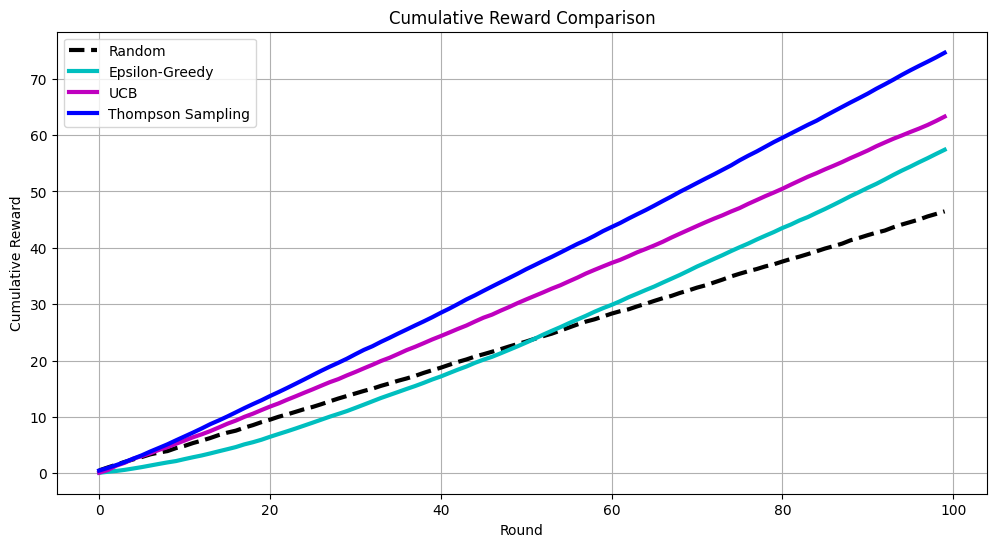

In [9]:
# Calculate mean cumulative rewards
mean_rewards_random = np.mean(rewards_random, axis=0)
mean_rewards_epsilon_greedy = np.mean(rewards_epsilon_greedy, axis=0)
mean_rewards_ucb = np.mean(rewards_ucb, axis=0)
mean_rewards_thompson = np.mean(rewards_thompson, axis=0)

# Plot cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards_random, label='Random', linestyle='--', lw=3, c='k')
plt.plot(mean_rewards_epsilon_greedy, label='Epsilon-Greedy', lw=3, c='c')
plt.plot(mean_rewards_ucb, label='UCB', lw=3, c='m')
plt.plot(mean_rewards_thompson, label='Thompson Sampling', lw=3, c='b')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Comparison')
plt.legend()
plt.grid(True)
plt.show()

and here in terms of **regret**, showing the difference between the reward of the optimal machine and the reward obtained by each algorithm.

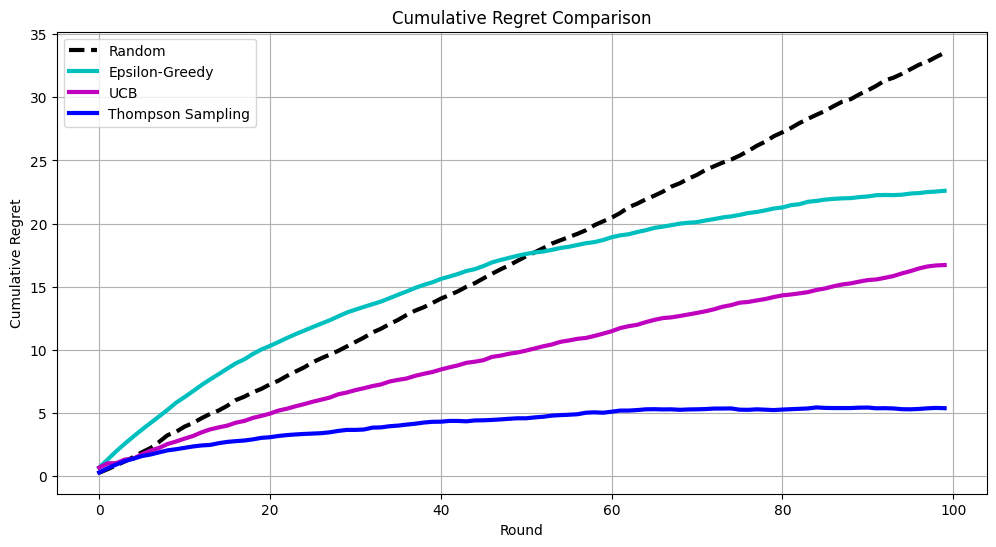

In [10]:
# Calculate regret
optimal_mean = max(true_means)
regret_random = optimal_mean * np.arange(1, n_rounds + 1) - mean_rewards_random
regret_epsilon_greedy = optimal_mean * np.arange(1, n_rounds + 1) - mean_rewards_epsilon_greedy
regret_ucb = optimal_mean * np.arange(1, n_rounds + 1) - mean_rewards_ucb
regret_thompson = optimal_mean * np.arange(1, n_rounds + 1) - mean_rewards_thompson

# Plot regret
plt.figure(figsize=(12, 6))
plt.plot(regret_random, label='Random', linestyle='--', lw=3, c='k')
plt.plot(regret_epsilon_greedy, label='Epsilon-Greedy', lw=3, c='c')
plt.plot(regret_ucb, label='UCB', lw=3, c='m')
plt.plot(regret_thompson, label='Thompson Sampling', lw=3, c='b')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Comparison')
plt.legend()
plt.grid(True)
plt.show()

Through these plots, we can visually compare the efficiency and performance of different algorithms in balancing exploration and exploitation, highlighting the advantages of more sophisticated MAB strategies over a random approach.